<a href="https://colab.research.google.com/github/ashutosh-linux/AIML/blob/main/ASSIGNMENT_4_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear regression primer

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

### 1.Import packages and dataset

Moscow pricing dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/archive (5).zip")
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


### Check basic info on the data set

**'info()' method to check the data types and number**

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


**'describe()' method to get the statistical summary of the various features of the data set**

In [ ]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
10%,5.177500e+06,5.000000,0.000000,25.000000,12.300000,5.900000,2.000000,6.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
90%,8.300000e+07,19.000000,4.000000,139.000000,74.400000,20.450000,18.000000,25.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


**'columns' method to get the names of the columns (features)**

In [ ]:
df.columns

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

### Basic plotting and visualization on the data set

**Pairplots using seaborn**

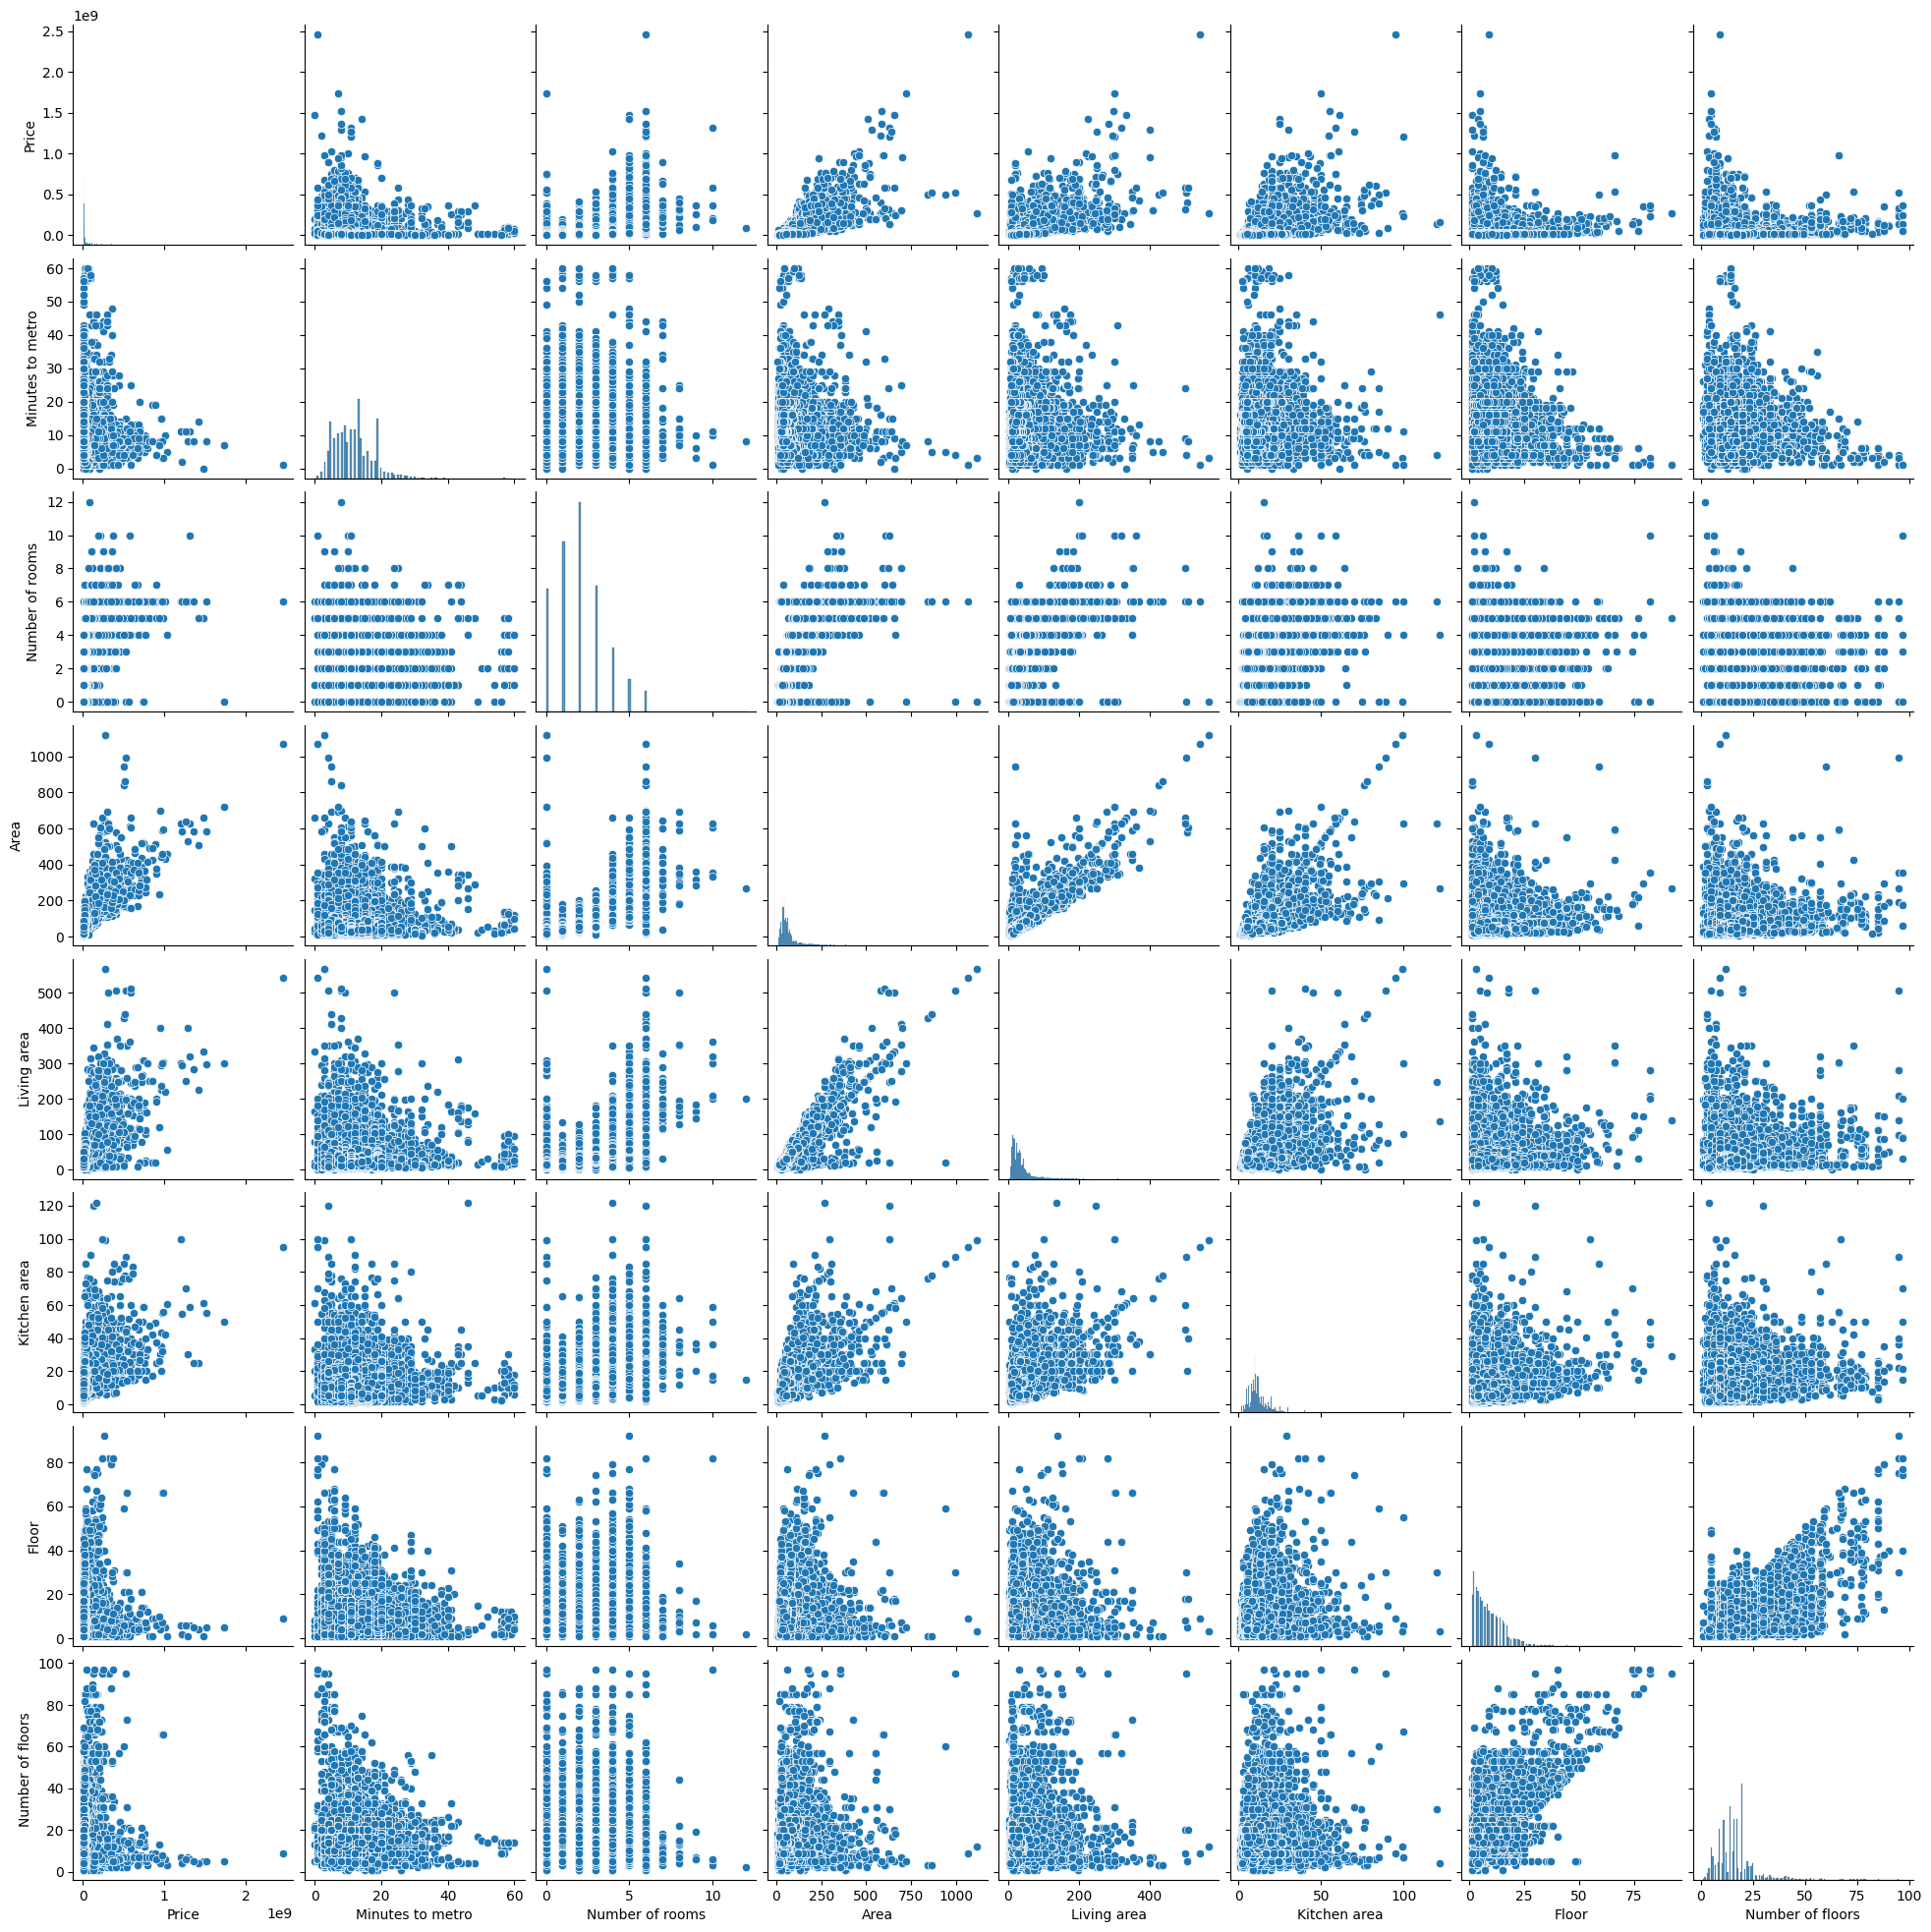

In [ ]:
sns.pairplot(df)

In [ ]:
print(df.columns)

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')


**Distribution of price (the predicted quantity)**

<Axes: ylabel='Frequency'>

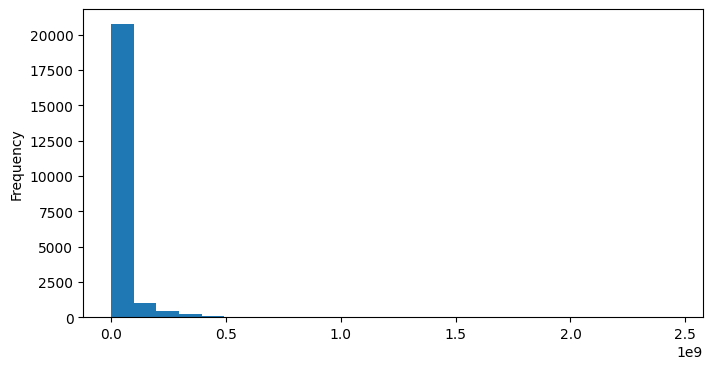

In [ ]:
df["Price"].plot.hist(bins=25,figsize=(8,4))



In [ ]:
print(df.columns)

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')


**Correlation matrix and heatmap**

In [ ]:
df = pd.get_dummies(df, columns=['Apartment type'])

### Feature and variable sets

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            print(f"Could not convert column {col} to numeric")
df.corr()

,Price,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Apartment type_New building,Apartment type_Secondary
Price,1.000000,NaN,-0.105382,NaN,0.490820,0.794226,0.709296,0.582940,0.019080,-0.022134,NaN,-0.287179,0.287179
Metro station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Minutes to metro,-0.105382,NaN,1.000000,NaN,-0.082357,-0.094937,-0.085614,-0.062436,0.017230,-0.031209,NaN,-0.041318,0.041318
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of rooms,0.490820,NaN,-0.082357,NaN,1.000000,0.687145,0.657565,0.476534,0.087446,0.074045,NaN,-0.237795,0.237795
Area,0.794226,NaN,-0.094937,NaN,0.687145,1.000000,0.906604,0.731963,0.083480,0.044465,NaN,-0.272074,0.272074
Living area,0.709296,NaN,-0.085614,NaN,0.657565,0.906604,1.000000,0.610039,0.072477,0.036737,NaN,-0.274719,0.274719
Kitchen area,0.582940,NaN,-0.062436,NaN,0.476534,0.731963,0.610039,1.000000,0.133737,0.108035,NaN,-0.177350,0.177350
Floor,0.019080,NaN,0.017230,NaN,0.087446,0.083480,0.072477,0.133737,1.000000,0.596803,NaN,0.059943,-0.059943
Number of floors,-0.022134,NaN,-0.031209,NaN,0.074045,0.044465,0.036737,0.108035,0.596803,1.000000,NaN,-0.070520,0.070520


**Make a list of data frame column names**

In [ ]:
## Y = MX +C where Y is dependent, X is independent features
## M is slope, C is intercept
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column, len_feature

(['Price',
  'Metro station',
  'Minutes to metro',
  'Region',
  'Number of rooms',
  'Area',
  'Living area',
  'Kitchen area',
  'Floor',
  'Number of floors',
  'Renovation',
  'Apartment type_New building',
  'Apartment type_Secondary'],
 13)

**Put all the numerical features in X and Median House Value in y,<br>
ignore lat, long which is string for linear regression**

In [ ]:
X = df[l_column[2:len_feature-1]]
y = df[l_column[len_feature-1]]

In [ ]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (22676, 10)
Variable set size: (22676,)


In [ ]:
X.head()

,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Apartment type_New building
0,6.0,NaN,1.0,30.6,11.1,8.5,25.0,25,NaN,False
1,2.0,NaN,1.0,49.2,20.0,10.0,6.0,15,NaN,False
2,14.0,NaN,1.0,44.7,16.2,13.1,10.0,25,NaN,False
3,8.0,NaN,1.0,35.1,16.0,11.0,12.0,33,NaN,False
4,6.0,NaN,1.0,37.7,15.2,4.0,5.0,5,NaN,False


In [ ]:
y.head()

,Apartment type_Secondary
0,True
1,True
2,True
3,True
4,True


### Part -02: Test-train split

**Import train_test_split function from scikit-learn**

In [ ]:
from sklearn.model_selection import train_test_split

**Create X and y train and test splits into 80-20 ratio in one command using <br>
a split ratio and a random seed**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=123)

In [ ]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((13600,), (3400,), (13600, 6), (3400, 6))

**Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)**

In [ ]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (13600, 6)
Test feature set size: (3400, 6)
Training variable set size: (13600,)
Test variable set size: (3400,)


### Model fit and training

**Import linear regression model estimator from scikit-learn and instantiate**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

**Fit the model on to the instantiated object itself**

In [ ]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression()

**Check the intercept and coefficients and put them in a DataFrame**

In [ ]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -47047.711648641736


In [ ]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [ 1.90283604e+03 -1.93077011e+01  9.32748894e+01 -4.03035245e+01
  1.43008029e+02  4.80070931e+04]


In [ ]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


### Calculation of standard errors and t-statistic for the coefficients

In [ ]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[
        list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)

#cdf['Standard Error']=se
#cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
#cdf

In [ ]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


Text(0.5, 1.0, 'Area Population vs. Price')

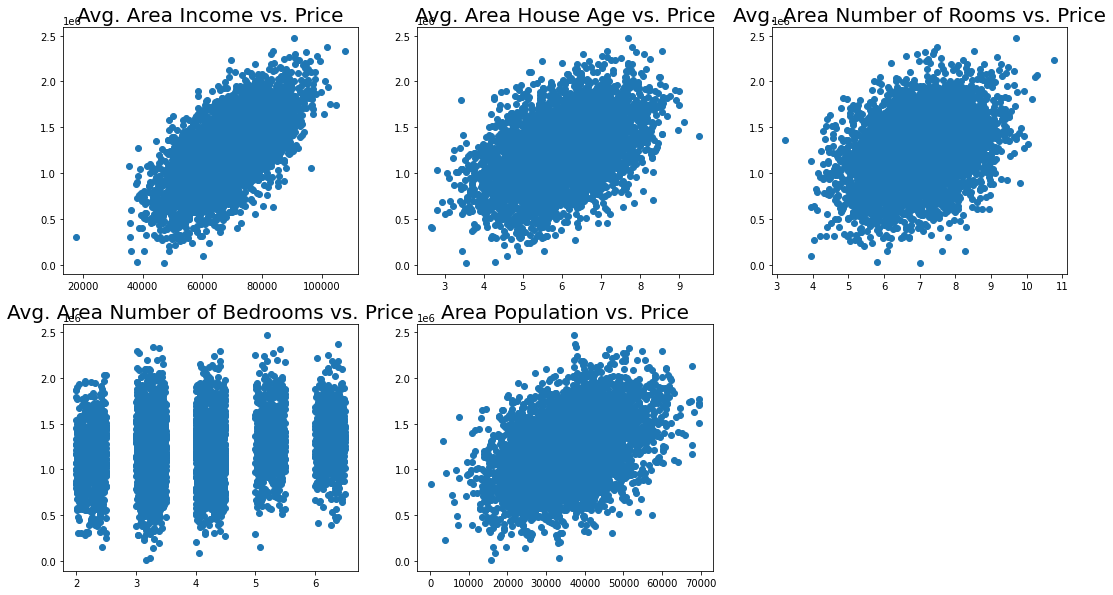

In [ ]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Price'])
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Price'])
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Price'])
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Price'])
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})

**R-square of the model fit**

In [ ]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.917


### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**

In [ ]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

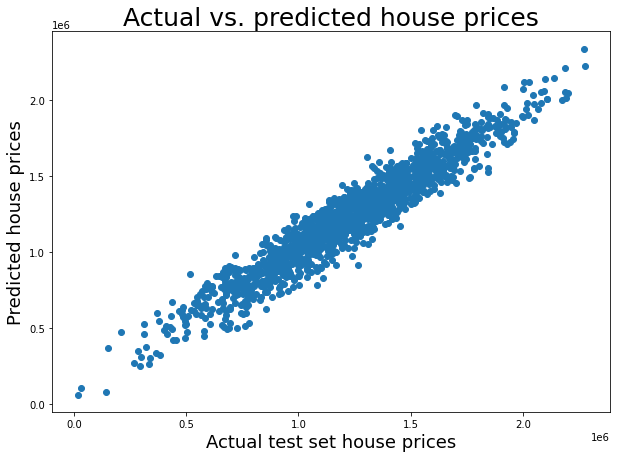

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)**

<AxesSubplot:title={'center':'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

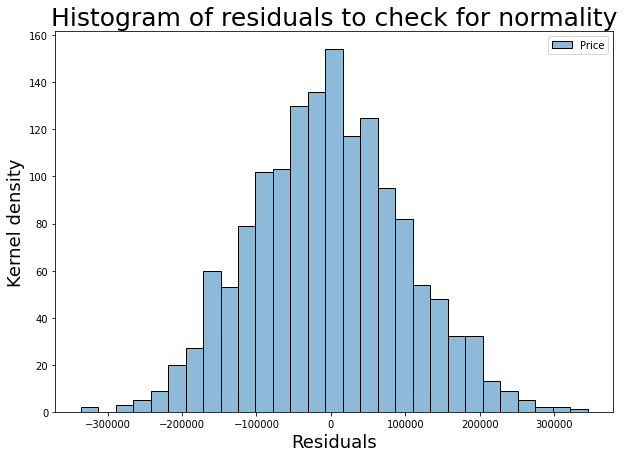

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot([y_test-predictions])

**Scatter plot of residuals and predicted values (Homoscedasticity)**

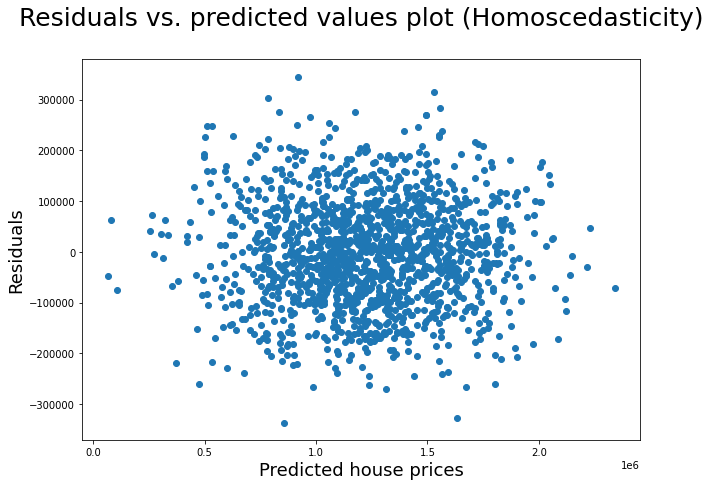

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

**Regression evaluation metrices**

In [ ]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 81739.77482718184
Mean square error (MSE): 10489638335.804985
Root mean square error (RMSE): 102418.9354358118


**R-square value**

In [ ]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.919


In [ ]:
#compute minmax value for observed price and expected price
import numpy as np
min=np.min(predictions/6000)
max=np.max(predictions/12000)
print(min, max)

10.57339854753646 195.1436397351686


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.01548743,  0.08451257,  0.18451257,  0.28451257,  0.38451257,
         0.48451257,  0.58451257,  0.68451257,  0.78451257,  0.88451257,
         0.98451257]),
 <BarContainer object of 10 artists>)

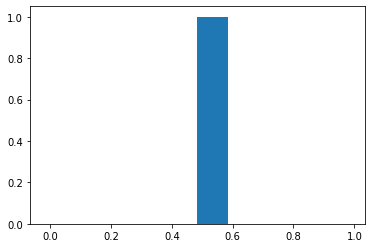

In [ ]:
#Compute MinMax value for Price=100
L = (100 - min)/(max - min)
L
plt.hist(L)